# CNN on [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
single_image = X_train[0]
single_image.shape

(28, 28)

In [4]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

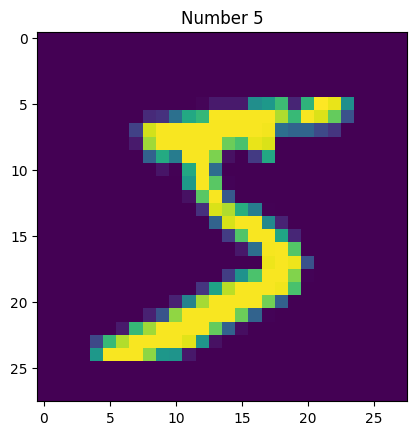

In [5]:
plt.title(f"Number {y_train[0]}")
plt.imshow(single_image)
plt.show()

In [6]:
from keras.utils import to_categorical

y_train.shape

(60000,)

In [7]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [8]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [10]:
single_image.max()

255

In [11]:
single_image.min()

0

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
scaled_image = X_train[0]
scaled_image.min(), scaled_image.max()

(0.0, 1.0)

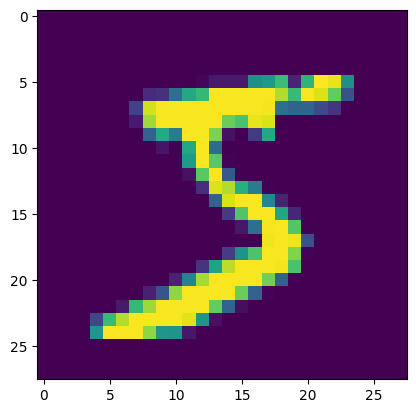

In [14]:
plt.imshow(scaled_image)
plt.show()

In [15]:
# batch_size, width, height, color_channels
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
# Multi-class problem
model.add(Dense(10, activation="softmax"))
# url: keras.io/metrics
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [17]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3)

In [18]:
model.fit(X_train, y_cat_train, epochs=10,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop], verbose=1)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1348 - accuracy: 0.9589 - val_loss: 0.0561 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0420 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0443 - val_accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0449 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0478 -

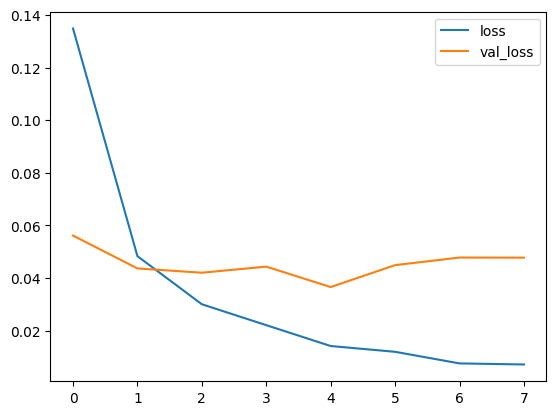

In [19]:
df_loss = pd.DataFrame(model.history.history)
df_loss[["loss", "val_loss"]].plot()
plt.show()

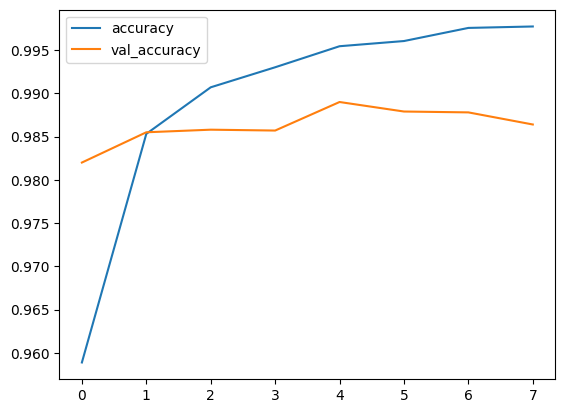

In [20]:
df_loss[["accuracy", "val_accuracy"]].plot()
plt.show()

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.04775026813149452, 0.9864000082015991]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert the one-hot softmax output to the sparse output, e.g.:
# [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], ...] -> [9, 2, ...]
predictions = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, predictions))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
print(confusion_matrix(y_test, predictions))

[[ 974    1    2    1    0    0    2    0    0    0]
 [   0 1130    0    1    0    0    2    1    1    0]
 [   1    5 1019    2    0    0    0    3    2    0]
 [   0    0    2  993    0   11    0    1    2    1]
 [   1    2    0    0  972    0    2    0    0    5]
 [   1    0    0    4    0  885    2    0    0    0]
 [   4    3    0    1    2    1  945    0    2    0]
 [   1    6    8    1    0    0    0 1009    1    2]
 [   2    2    1    2    0    2    0    1  960    4]
 [   0    7    2    1    5   10    0    5    2  977]]


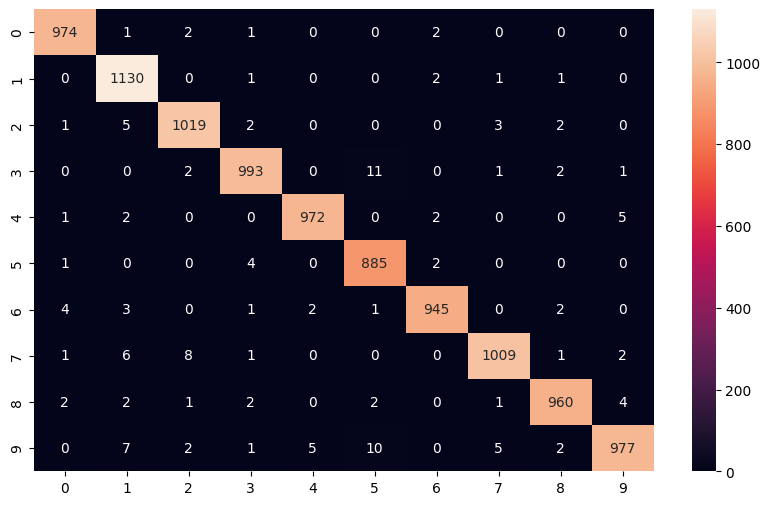

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')
plt.show()

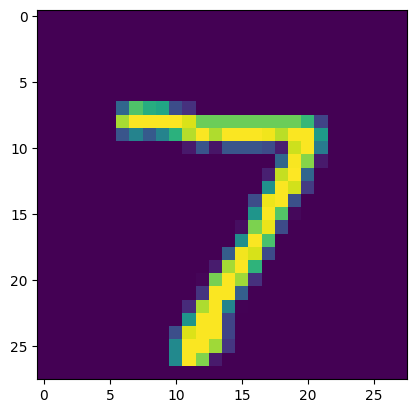

In [49]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28, 28))
plt.show()

In [50]:
# num_images, width, height, color_channels
np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 27ms/step


7